In [2]:
!pip install opencv-python  #for import cv2

    100% |████████████████████████████████| 6.7MB 148kB/s eta 0:00:01    28% |█████████▎                      | 1.9MB 5.0MB/s eta 0:00:01    55% |█████████████████▉              | 3.7MB 5.7MB/s eta 0:00:01


In [11]:
pwd

'/home/ubuntu/Documents/Project_II'

In [14]:
!pip install pillow #for from PIL import Image

    100% |████████████████████████████████| 5.8MB 200kB/s ta 0:00:011   84% |███████████████████████████     | 4.9MB 5.3MB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 4.3MB/s ta 0:00:01
  Running setup.py install for olefile ... done


In [26]:
!pip install matplotlib #for from matplotlib import pyplot

    100% |████████████████████████████████| 14.6MB 80kB/s  eta 0:00:01 5% |█▋                              | 737kB 4.4MB/s eta 0:00:04    37% |████████████                    | 5.4MB 4.4MB/s eta 0:00:03
    100% |████████████████████████████████| 61kB 1.6MB/s ta 0:00:011


In [ ]:
screenshot




==========
with (screenshot)

In [95]:
#存驗證碼圖檔

import requests
r = requests.get('http://210.65.131.75/N11/ImageNumberN13?')
with open('pic3.jpg','wb') as f:
    f.write(r.content)

In [96]:
#寫入驗證碼圖檔

import cv2

from PIL import Image
image = Image.open('/home/ubuntu/Documents/Project_II/pic3.jpg')
image

In [98]:
#將圖檔轉成數字

import PIL 
import numpy
pil_image = PIL.Image.open('pic3.jpg').convert('RGB')
open_cv_image = numpy.array(pil_image)



In [ ]:
#open_cv_image

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


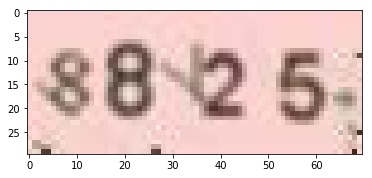

In [99]:
#將圖檔再次傳換

%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [100]:
#選字
import cv2
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127,255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [101]:
cnts = sorted([(c,cv2.boundingRect(c)[0]) for c in contours], key =lambda x:x[1])

In [105]:
ary =[]
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print((x,y,w,h))
    if w >= 6 and h in range(11,18):
        ary.append((x,y,w,h))

(0, 0, 70, 30)
(4, 16, 7, 6)
(4, 9, 10, 11)
(10, 10, 4, 4)
(16, 6, 11, 17)
(19, 15, 5, 5)
(19, 9, 5, 4)
(33, 15, 3, 3)
(34, 16, 3, 3)
(35, 17, 3, 3)
(36, 8, 10, 15)
(52, 8, 11, 16)
(65, 17, 4, 3)


In [106]:
print(ary)

[(4, 9, 10, 11), (16, 6, 11, 17), (36, 8, 10, 15), (52, 8, 11, 16)]


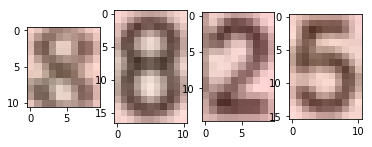

In [107]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h,x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

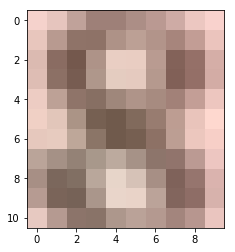

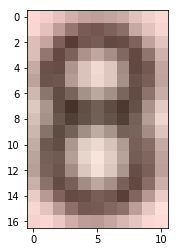

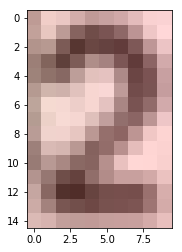

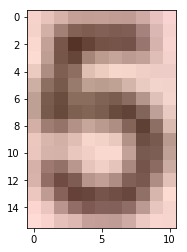

In [108]:
from matplotlib import pyplot as plt

for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h,x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}.jpg'.format(id+1), dpi =100)

In [1]:
import cv2
import requests
import PIL 
from PIL import Image
import numpy
%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# specialty


In [4]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz
  Running setup.py install for sklearn ... done


In [6]:
!pip install scipy

    100% |████████████████████████████████| 48.2MB 25kB/s eta 0:00:011  2% |▉                               | 1.2MB 21.6MB/s eta 0:00:03    8% |██▊                             | 4.1MB 10.7MB/s eta 0:00:05    27% |████████▉                       | 13.4MB 7.4MB/s eta 0:00:05    45% |██████████████▌                 | 21.9MB 4.3MB/s eta 0:00:07    57% |██████████████████▌             | 27.9MB 2.4MB/s eta 0:00:09    62% |████████████████████            | 30.2MB 4.5MB/s eta 0:00:05    71% |██████████████████████▉         | 34.4MB 4.6MB/s eta 0:00:03    79% |█████████████████████████▌      | 38.4MB 2.6MB/s eta 0:00:04    86% |███████████████████████████▊    | 41.7MB 5.8MB/s eta 0:00:02    88% |████████████████████████████▏   | 42.5MB 4.2MB/s eta 0:00:02    92% |█████████████████████████████▊  | 44.7MB 3.9MB/s eta 0:00:01    95% |██████████████████████████████▋ | 46.2MB 3.0MB/s eta 0:00:01


In [43]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

import numpy as np

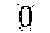

In [44]:
import PIL 
import numpy
basewidth = 50

pil_image = PIL.Image.open('/home/ubuntu/Documents/Project_II/image_sample/0/1.jpg').convert('1')
wpercent = (basewidth/float(pil_image.size[0]))
hsize = int((float(pil_image.size[1])*float(wpercent)))
img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
img

Populating the interactive namespace from numpy and matplotlib


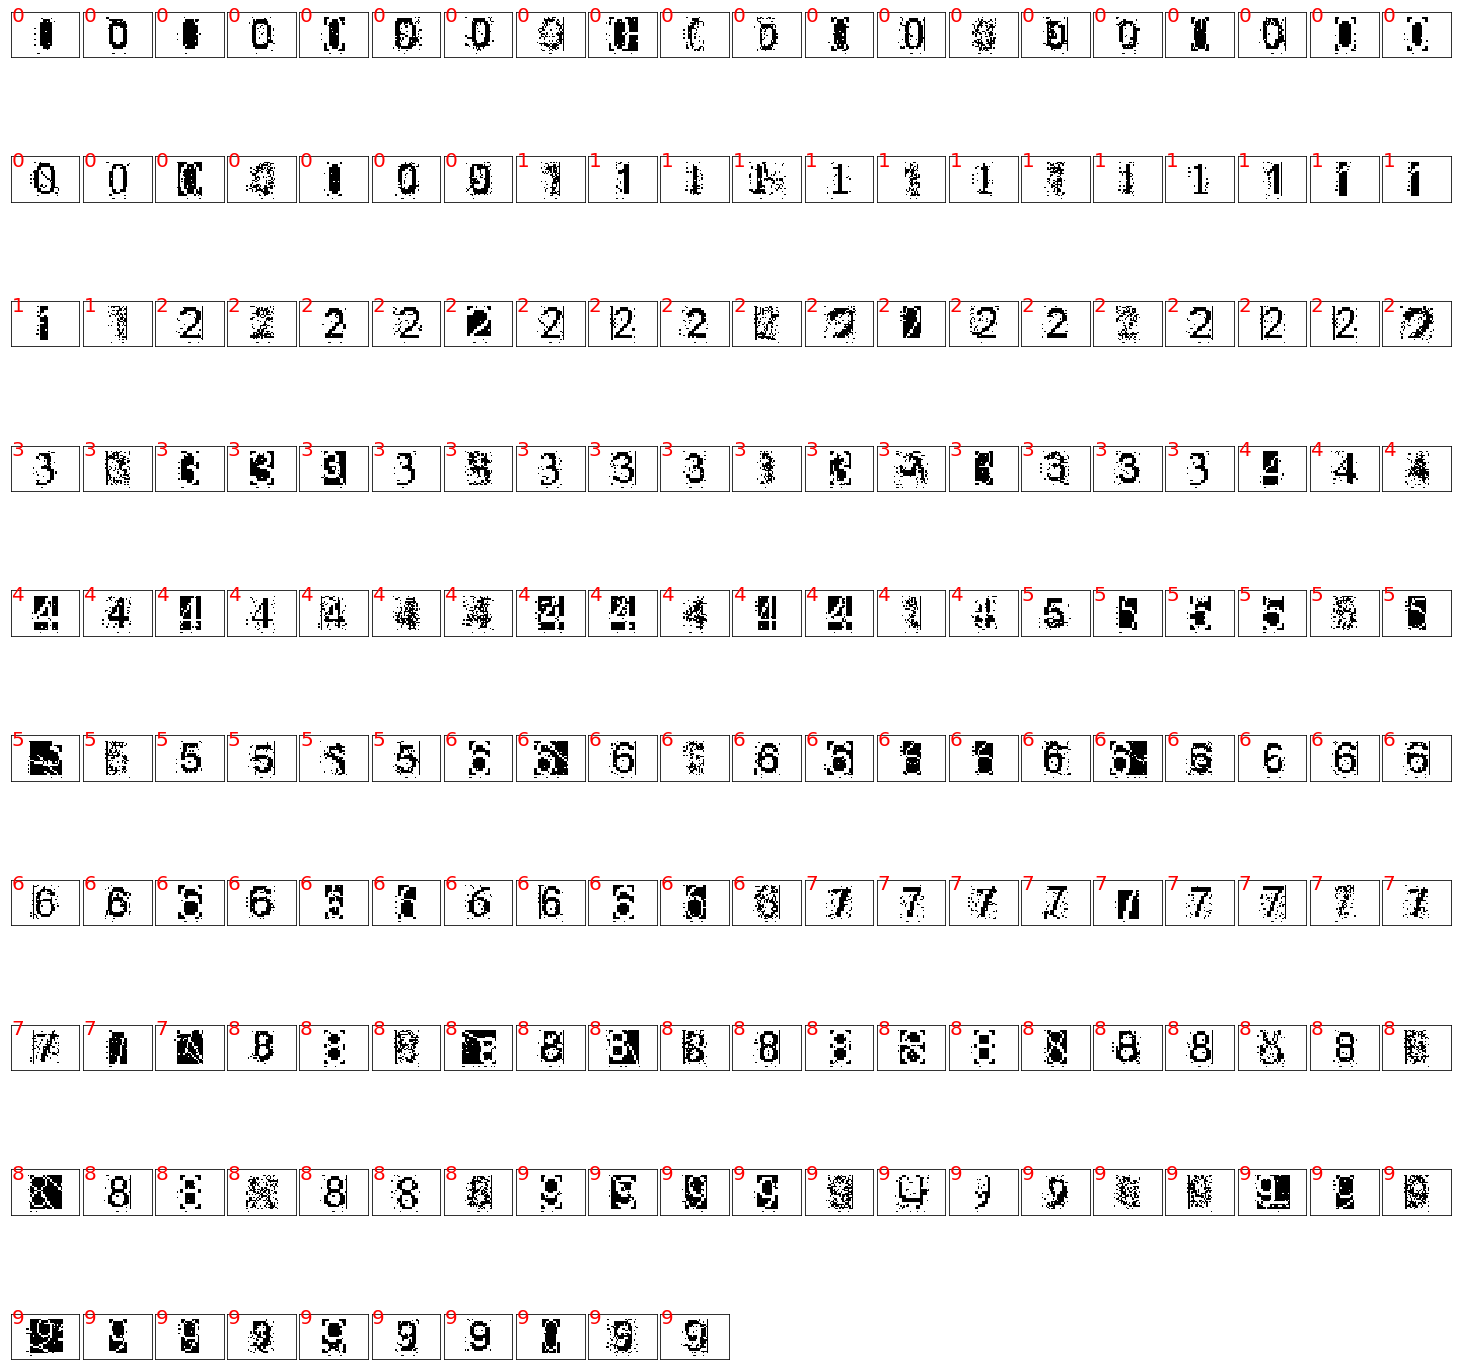

In [118]:
%pylab inline
import PIL 
import os 
digits = []
labels = []
basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)
for i in range(0,10):
    for img in os.listdir('image_sample/{}/'.format(i)):
        pil_image = PIL.Image.open('image_sample/{}/{}'.format(i,img)).convert('1')

        wpercent = (basewidth/float(pil_image.size[0]))
        hsize = int((float(pil_image.size[1])*float(wpercent)))
        img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)

        ax = fig.add_subplot(10, 20, cnt+1, xticks=[],yticks=[])
        ax.imshow(img,cmap=plt.cm.binary,interpolation='nearest')
        ax.text(0,7,str(i), color='red',fontsize = 20)
        cnt = cnt +1

        digits.append([pixel for pixel in iter(img.getdata())])
        labels.append(i)

In [119]:
import numpy
digit_ary = numpy.array(digits)

In [120]:
digit_ary.shape

(190, 1650)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digit_ary)
X_scaled = scaler.transform(digit_ary)

/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [122]:
#機器學習拉


mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation ='logistic', max_iter = 500) #max_iter越越精準高
mlp.fit(X_scaled,labels)

/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [123]:
predicted = mlp.predict(X_scaled)

In [124]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9])

In [125]:
target = numpy.array(labels)

In [126]:
predicted == target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Populating the interactive namespace from numpy and matplotlib


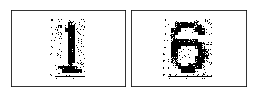

In [127]:
#將測試的圖片轉檔

%pylab inline
import os
import PIL

fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for idx, img in enumerate(os.listdir('image_sample/prediction/')):
    pil_image = PIL.Image.open('image_sample/prediction/{}'.format(img)).convert('1')
    ax = fig.add_subplot(10,12, idx+1, xticks=[],yticks=[])
    ax.imshow(pil_image,cmap=plt.cm.binary,interpolation="nearest")

In [128]:
%pylab inline
import os 
data = []

basewidth = 50
fig = plt.figure(figsize = (20,20))
cnt = 0
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)
for idx, img in enumerate(os.listdir('image_sample/prediction/')):
    
    pil_image = PIL.Image.open('image_sample/prediction/{}'.format(img)).convert('1')

    wpercent = (basewidth/float(pil_image.size[0]))
    hsize = int((float(pil_image.size[1])*float(wpercent)))
    img = pil_image.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
    data.append([pixel for pixel in iter(img.getdata())])

Populating the interactive namespace from numpy and matplotlib


In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [130]:
mlp.predict(data_scaled)

array([1, 8])

# gun fire ahead

In [96]:
!pwd

/home/ubuntu/Documents/Project_II


Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


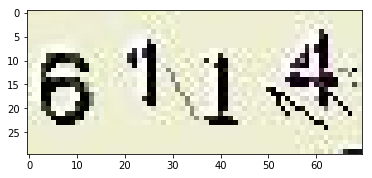

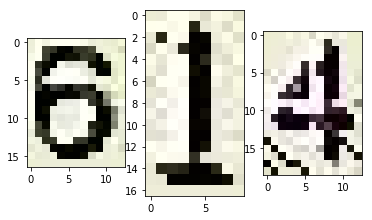

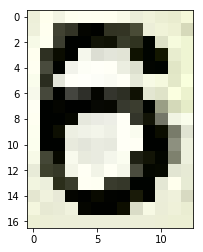

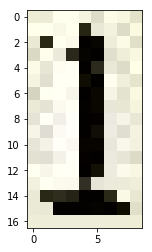

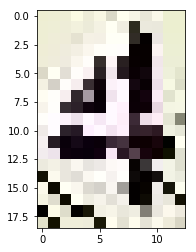

In [100]:
import cv2
import requests
import PIL 
from PIL import Image
import numpy
%pylab inline
from matplotlib import pyplot as plt

for i in range(71,72):
#存驗證碼圖檔
    r = requests.get('http://210.65.131.75/N11/ImageNumberN13?')
    with open('pic/pic'+str(i)+'.jpg','wb') as f:
        f.write(r.content)
        
#================        
#寫入驗證碼圖檔
    image = Image.open('pic/pic'+str(i)+'.jpg')
    #image
#將圖檔轉成數字
    pil_image = PIL.Image.open('pic/pic'+str(i)+'.jpg').convert('RGB')
    open_cv_image = numpy.array(pil_image)
#將圖檔再次傳換
    plt.imshow(open_cv_image)



    imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127,255, 0)
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

    cnts = sorted([(c,cv2.boundingRect(c)[0]) for c in contours], key =lambda x:x[1])


#裁字
    ary =[]
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
#         print((x,y,w,h))
        if w >= 6 and h in range(13,20):
            ary.append((x,y,w,h))
# print('====================')
# print(ary)

#選字

    fig = plt.figure()
    for id, (x,y,w,h) in enumerate(ary):
        roi = open_cv_image[y:y+h,x:x+w]
        thresh = roi.copy()
        a = fig.add_subplot(1, len(ary), id+1)
        plt.imshow(thresh)

#印字

    for id, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        roi = open_cv_image[y:y+h,x:x+w]
        thresh = roi.copy()
        plt.imshow(thresh)
        plt.savefig('{}.jpg'.format(id+i*3), dpi =100)